
# 4.1.2 — Formule d’Itô & Équations Différentielles Stochastiques (EDS)

## 🎯 Objectifs pédagogiques
À la fin de ce notebook, vous serez capable de :
- Expliquer **l’intégrale d’Itô** et la **formule d’Itô** (1D et multi-dimension).
- Modéliser un processus via une **EDS** : $dX_t = \mu(t,X_t)\,dt + \sigma(t,X_t)\,dW_t$.
- Relier le **mouvement brownien géométrique (GBM)** à **Black–Scholes**.
- **Simuler** des trajectoires par **Euler–Maruyama**.
- Interpréter le rôle du **drift** $\mu$ et de la **diffusion** $\sigma$.



## 1) De l’intuition à la définition : l’intégrale d’Itô

**Idée** : une intégrale stochastique est une **limite de sommes** où l’on échantillonne l’intégrande **au bord gauche** (adaptation à la filtration) et où les incréments sont aléatoires.

Pour un processus adapté $H_t$ (intégrande) et un brownien $W_t$ :
$$
\int_0^T H_t \, dW_t \;:=\; \lim_{n\to\infty} \sum_{k=0}^{n-1} H_{t_k}\,\big(W_{t_{k+1}}-W_{t_k}\big),
$$
où $0=t_0<t_1<\cdots<t_n=T$ est un partitionnement avec pas qui tend vers $0$.  
Contrairement à Riemann–Stieltjes, **le terme quadratique** de $W$ est **d’ordre $dt$** ($[W]_t=t$), ce qui change l’algèbre différentielle.

**Règles d’Itô (mnémotechnique)**
- $(dW_t)^2 = dt$
- $dt \cdot dW_t = 0$, $(dt)^2 = 0$
- $d(\text{constante}) = 0$



## 2) Formule d’Itô (1 dimension)

Soit un processus $X_t$ qui suit l’EDS $dX_t=\mu(t,X_t)\,dt+\sigma(t,X_t)\,dW_t$, et une fonction $f(t,x)$ de classe $C^{1,2}$.  
Alors :
$$
df(t,X_t)\;=\;\Big(\partial_t f + \mu\,\partial_x f + \tfrac12\,\sigma^2\,\partial_{xx} f \Big)\,dt \;+\; \sigma\,\partial_x f \, dW_t.
$$

**Interprétation** : le terme $\tfrac12\,\sigma^2\,\partial_{xx}f$ provient de la **variation quadratique** du brownien.



### Formule d’Itô (dimension $d$)

Si $W_t$ est un brownien $\mathbb{R}^m$ et $X_t\in\mathbb{R}^d$ :
$$
dX_t = \mu(t,X_t)\,dt + \Sigma(t,X_t)\,dW_t,\quad \Sigma\in\mathbb{R}^{d\times m},
$$
et $f:\mathbb{R}_+\times\mathbb{R}^d\to\mathbb{R}$, alors
$$
df = \Big(\partial_t f + \nabla f^\top \mu + \tfrac12\,\mathrm{Tr}\big(\Sigma\Sigma^\top \nabla^2 f\big)\Big)\,dt
\;+\; (\nabla f)^\top \Sigma\, dW_t.
$$



## 3) Équations Différentielles Stochastiques (EDS)

Une EDS s’écrit en forme différentielle :
$$
dX_t \;=\; \mu(t,X_t)\,dt \;+\; \sigma(t,X_t)\,dW_t.
$$

- **Drift** $\mu$ : tendance moyenne de courte période (sens déterministe).  
- **Diffusion** $\sigma$ : intensité de l’aléa instantané (volatilité).

Sous des conditions classiques (Lipschitz, croissance linéaire), il existe une **solution forte** unique.



## 4) Mouvement brownien géométrique (GBM) et Black–Scholes

Le **GBM** modélise un prix positif $S_t$ :
$$
dS_t = \mu\,S_t\,dt + \sigma\,S_t\,dW_t.
$$
Appliquons Itô à $f(S_t)=\ln S_t$ :
$$
d(\ln S_t) = \Big(\mu-\tfrac12\sigma^2\Big)dt + \sigma\,dW_t.
$$
Donc
$$
S_t = S_0 \exp\!\Big(\big(\mu-\tfrac12\sigma^2\big)t + \sigma W_t\Big),
$$
ce qui implique que $S_t$ est **log-normal**.  
**Black–Scholes** suppose (sous mesure risque-neutre) $\mu=r$ (taux sans risque) et $\sigma$ constant.



## 5) Simulation par Euler–Maruyama (GBM)

Schéma d’Euler pour $dX_t=\mu X_t dt+\sigma X_t dW_t$ avec pas $\Delta t$ :
$$
X_{t+\Delta t} \approx X_t + \mu X_t\,\Delta t + \sigma X_t \,\Delta W_t,\quad \Delta W_t \sim \mathcal{N}(0,\Delta t).
$$


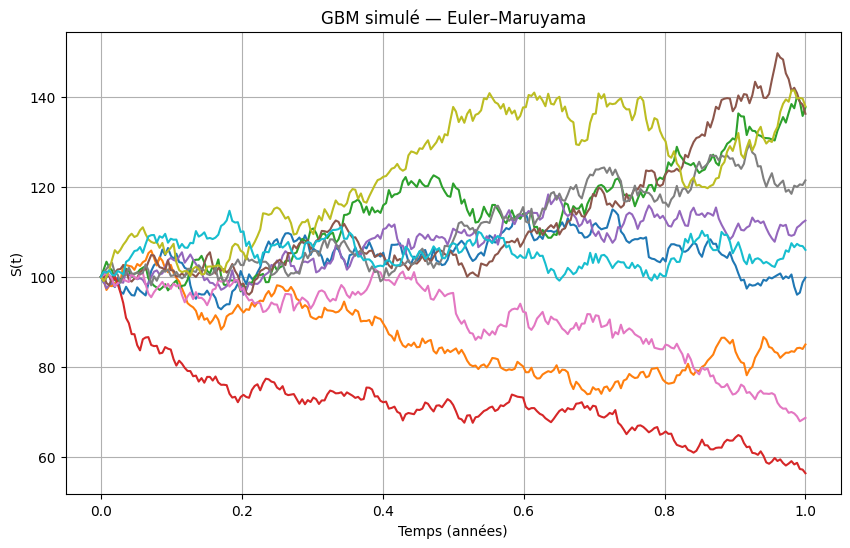

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

S0 = 100.0
mu = 0.05
sigma = 0.2
T = 1.0
N = 252
dt = T/N
n_paths = 10

dW = np.random.normal(0.0, np.sqrt(dt), size=(n_paths, N))
S = np.full((n_paths, N+1), S0, dtype=float)

for i in range(N):
    S[:, i+1] = S[:, i] + mu*S[:, i]*dt + sigma*S[:, i]*dW[:, i]

t = np.linspace(0, T, N+1)
plt.figure(figsize=(10,6))
for k in range(n_paths):
    plt.plot(t, S[k])
plt.title("GBM simulé — Euler–Maruyama")
plt.xlabel("Temps (années)")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()



### Distribution à l’échéance et log-normalité

Théoriquement :
$$
\ln S_T \sim \mathcal{N}\Big(\ln S_0 + \big(\mu-\tfrac12\sigma^2\big)T,\; \sigma^2 T\Big).
$$

On vérifie numériquement la moyenne et la variance de $\ln S_T$.


In [2]:

# Vérification statistique de la log-normalité
n_paths = 50_000
dW = np.random.normal(0.0, np.sqrt(dt), size=(n_paths, N))
S = np.full((n_paths, N+1), S0, dtype=float)
for i in range(N):
    S[:, i+1] = S[:, i] + mu*S[:, i]*dt + sigma*S[:, i]*dW[:, i]

log_ST = np.log(S[:, -1])
emp_mean = log_ST.mean()
emp_var = log_ST.var(ddof=1)

theo_mean = np.log(S0) + (mu - 0.5*sigma**2)*T
theo_var = (sigma**2)*T

emp_mean, theo_mean, emp_var, theo_var


(np.float64(4.635945714072246),
 np.float64(4.635170185988092),
 np.float64(0.04012298122843896),
 0.04000000000000001)


## 6) Rôle de $\mu$ et $\sigma$ (intuition graphique)

- Augmenter $\mu$ **déplace** la moyenne des trajectoires vers le haut.  
- Augmenter $\sigma$ **élargit** l’éventail, donc l’incertitude (variabilité).

On compare deux ensembles de trajectoires.


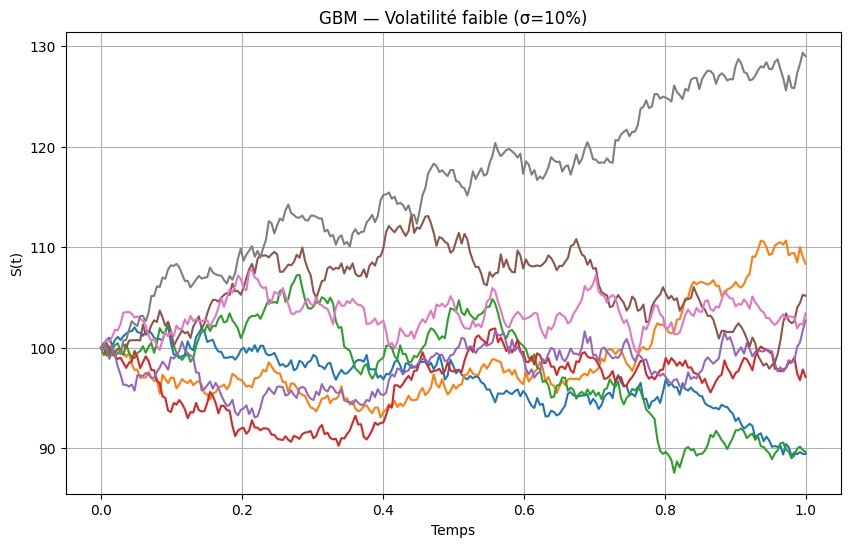

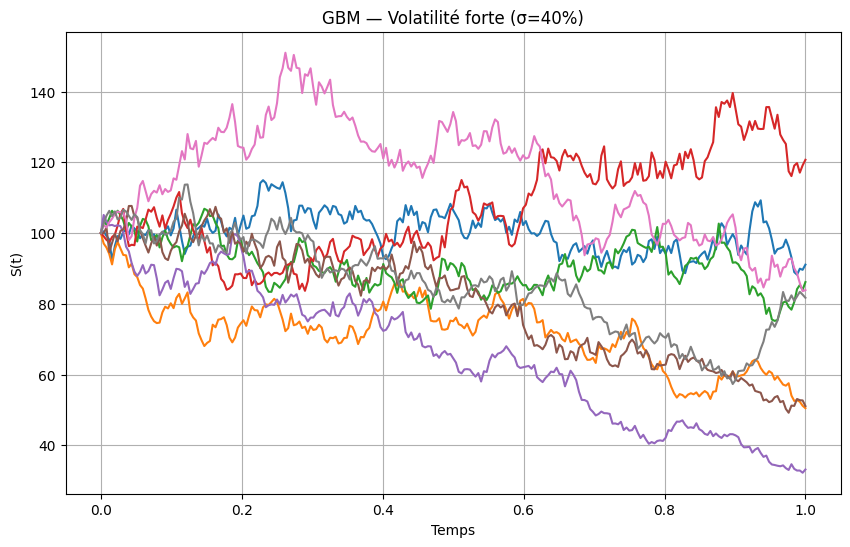

In [3]:

def simulate_gbm(S0, mu, sigma, T=1.0, N=252, n_paths=5, seed=0):
    rng = np.random.default_rng(seed)
    dt = T/N
    dW = rng.normal(0.0, np.sqrt(dt), size=(n_paths, N))
    S = np.full((n_paths, N+1), S0, dtype=float)
    for i in range(N):
        S[:, i+1] = S[:, i] + mu*S[:, i]*dt + sigma*S[:, i]*dW[:, i]
    return np.linspace(0, T, N+1), S

t, S_low_vol = simulate_gbm(100, 0.05, 0.10, n_paths=8, seed=1)
_, S_high_vol = simulate_gbm(100, 0.05, 0.40, n_paths=8, seed=2)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for k in range(S_low_vol.shape[0]):
    plt.plot(t, S_low_vol[k])
plt.title("GBM — Volatilité faible (σ=10%)")
plt.xlabel("Temps"); plt.ylabel("S(t)"); plt.grid(True); plt.show()

plt.figure(figsize=(10,6))
for k in range(S_high_vol.shape[0]):
    plt.plot(t, S_high_vol[k])
plt.title("GBM — Volatilité forte (σ=40%)")
plt.xlabel("Temps"); plt.ylabel("S(t)"); plt.grid(True); plt.show()



## 7) Exercices rapides

1. **(Itô sur $S^2$)** — Pour $dS_t=\mu S_t dt+\sigma S_t dW_t$, appliquer Itô à $f(S)=S^2$ et vérifier numériquement l’égalité obtenue en moyenne.  
2. **(Euler stable)** — Implémenter **Milstein** pour le GBM et comparer l’erreur au schéma **Euler**.  
3. **(Interprétation)** — Discuter l’effet de $\sigma$ sur le **risque de drawdown** d’une stratégie long-only.

---

## 📌 À retenir (pour l’oral)
- **Formule d’Itô** (1D) : 
  $$df = \big(\partial_t f + \mu \partial_x f + \tfrac12 \sigma^2 \partial_{xx} f\big)dt + \sigma \partial_x f\, dW.$$
- **EDS** : $dX=\mu dt+\sigma dW$, $\mu$ = drift, $\sigma$ = diffusion.  
- **GBM** : $S_t=S_0 \exp\!\big((\mu-\tfrac12\sigma^2)t+\sigma W_t\big)$ (log-normal).  
- **Simulation** : Euler–Maruyama ($\Delta W\sim\mathcal{N}(0,\Delta t)$).  
- **Lien Rates** : sous mesure risque-neutre, $\mu$ est relié au **taux court** ($r_t$), et les modèles de taux (Vasicek/CIR) changent la dynamique de $r_t$, pas de $S_t$.
